In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
top = os.getcwd()
alchemical = 'complex_1_20_200_200'
#alchemical_part = 'vdw_crg_one_step'
alchemical_part = 'restraint'

In [3]:
windows = [0.0, 0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [4]:
dhdl = []
for window in windows:
    with open(os.path.join(top, alchemical, 'vdw_crg_one_step', str(window), 'ti001.out')) as f:
        lines = [line for line in f.readlines() if line.strip()]
        index = 0
        # find start
        while not (lines[index].startswith('Summary')):
            index += 1
        index += 1
        # collect data
        while not(lines[index].startswith('End')):
            dhdl.append(float(lines[index]))
            index += 1
data = np.array(dhdl)
DHDL = data.reshape(16, 1000, 1000)

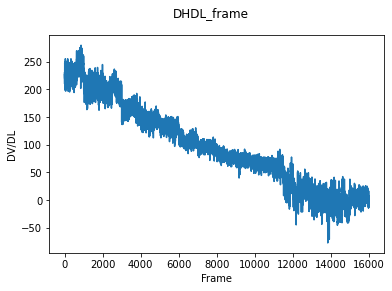

In [5]:
fig,ax = plt.subplots()
ax.plot( DHDL.mean(axis=2).reshape(16000))
fig.suptitle('DHDL_frame')
ax.set_xlabel('Frame')
ax.set_ylabel('DV/DL')
fig.savefig(os.path.join(top, alchemical, f'analysis/residue_analysis/complex/DHDL_frame.pdf'))

In [6]:
DHDL.shape

(16, 1000, 1000)

Text(0.5, 1.0, 'DHDL_lambda')

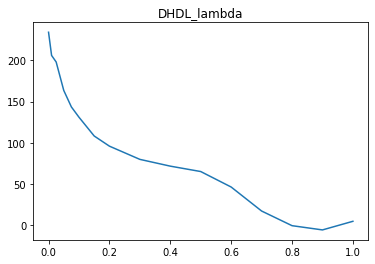

In [7]:
fig,ax = plt.subplots()
dhdl = DHDL.reshape(16,1000000).mean(axis=1)
ax.plot(windows,dhdl)
plt.title('DHDL_lambda')

In [8]:
area = 0
for i in range(len(dhdl)-1):
    area += (dhdl[i] + dhdl[i+1]) * (windows[i+1] - windows[i]) / 2
area

60.66240615754025

In [9]:
def plot_dhdl(file_name):
    dihedral_window = np.loadtxt(os.path.join(top,alchemical,f'analysis/residue_analysis/complex/{file_name}.dat'),usecols=1).reshape(16,1000)
    fig,ax = plt.subplots(4,4,sharex=True,sharey=True,figsize=(24,18))
    fig.suptitle(f'{file_name} VS DHDL')
    X = np.linspace(0,1000,1000)
    for i in range(16):
        line1, = ax[int(i/4),i%4].plot(X, dihedral_window[i], label=file_name,c='b')
        ax[int(i/4),i%4].set_xlabel('Frame')
        ax[int(i/4),i%4].set_ylabel(file_name)
        ax2 = ax[int(i/4),i%4].twinx()
        line2, = ax2.plot(X, DHDL[i][::1000].T, label ='DHDL',c='r')
        ax2.set_ylabel('DHDL')
        ax[int(i/4),i%4].legend(handles=[line1,line2],loc=1)
        ax[int(i/4),i%4].title.set_text(f'lambda_{windows[i]}')
        
    fig.savefig(os.path.join(top, alchemical, f'analysis/residue_analysis/complex/{file_name}_DHDL.pdf'))
    return 0

0

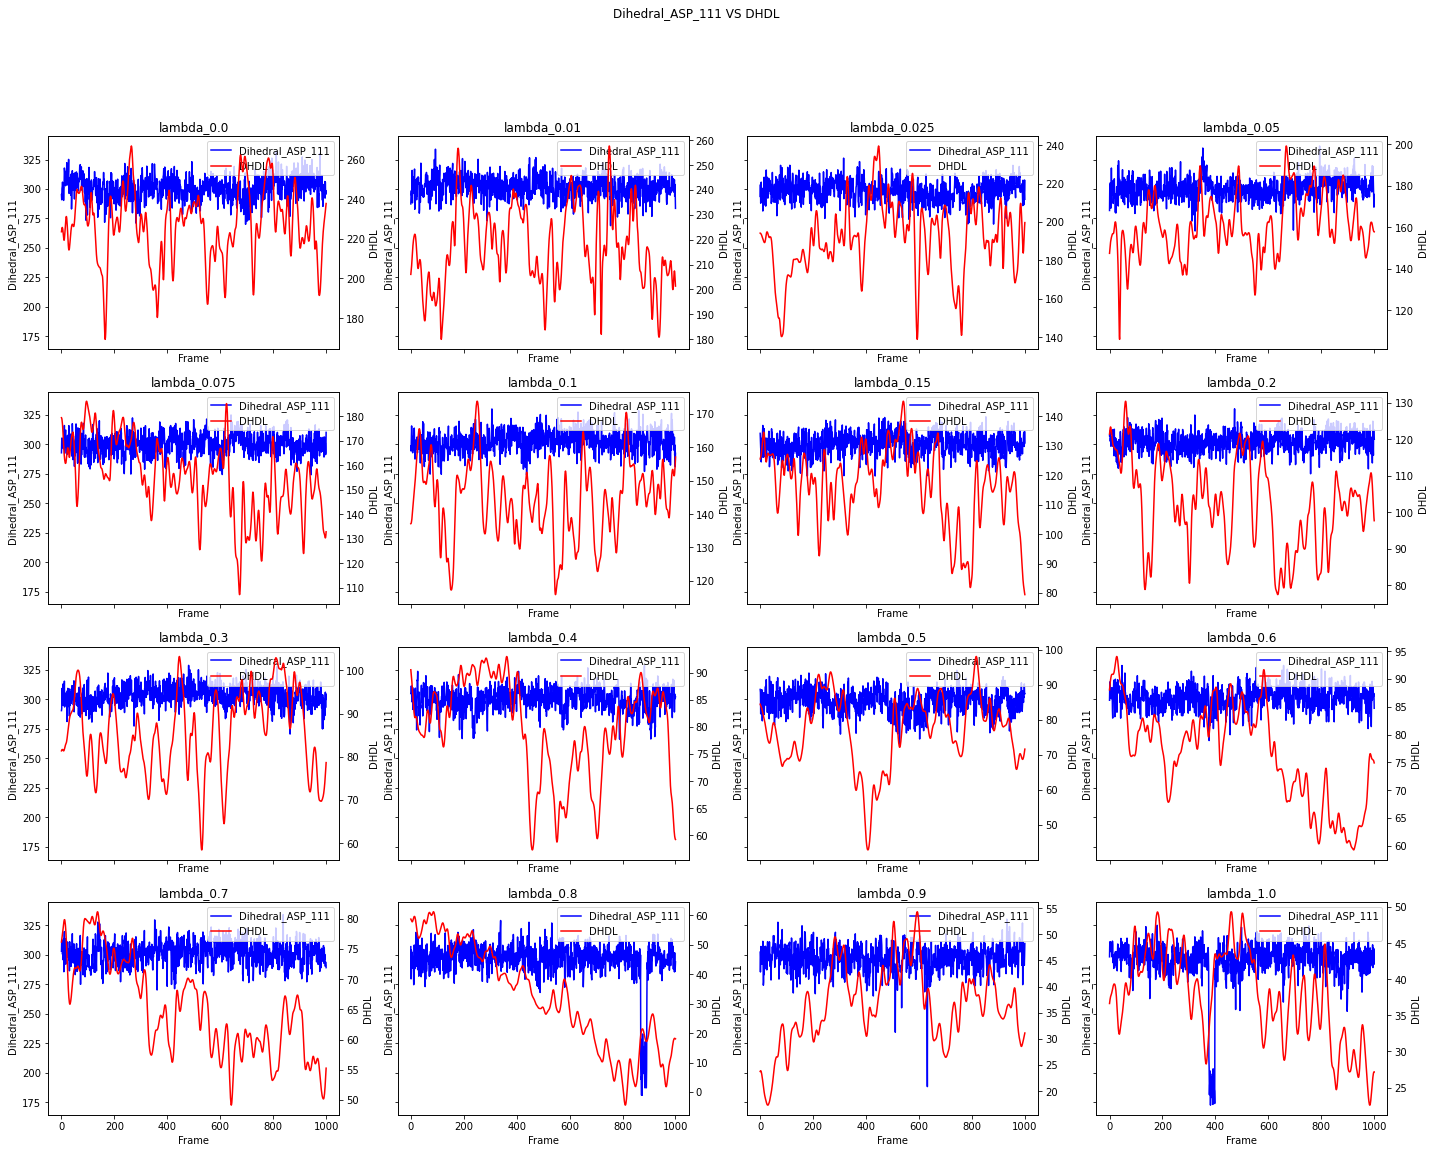

In [10]:
plot_dhdl('Dihedral_ASP_111')

0

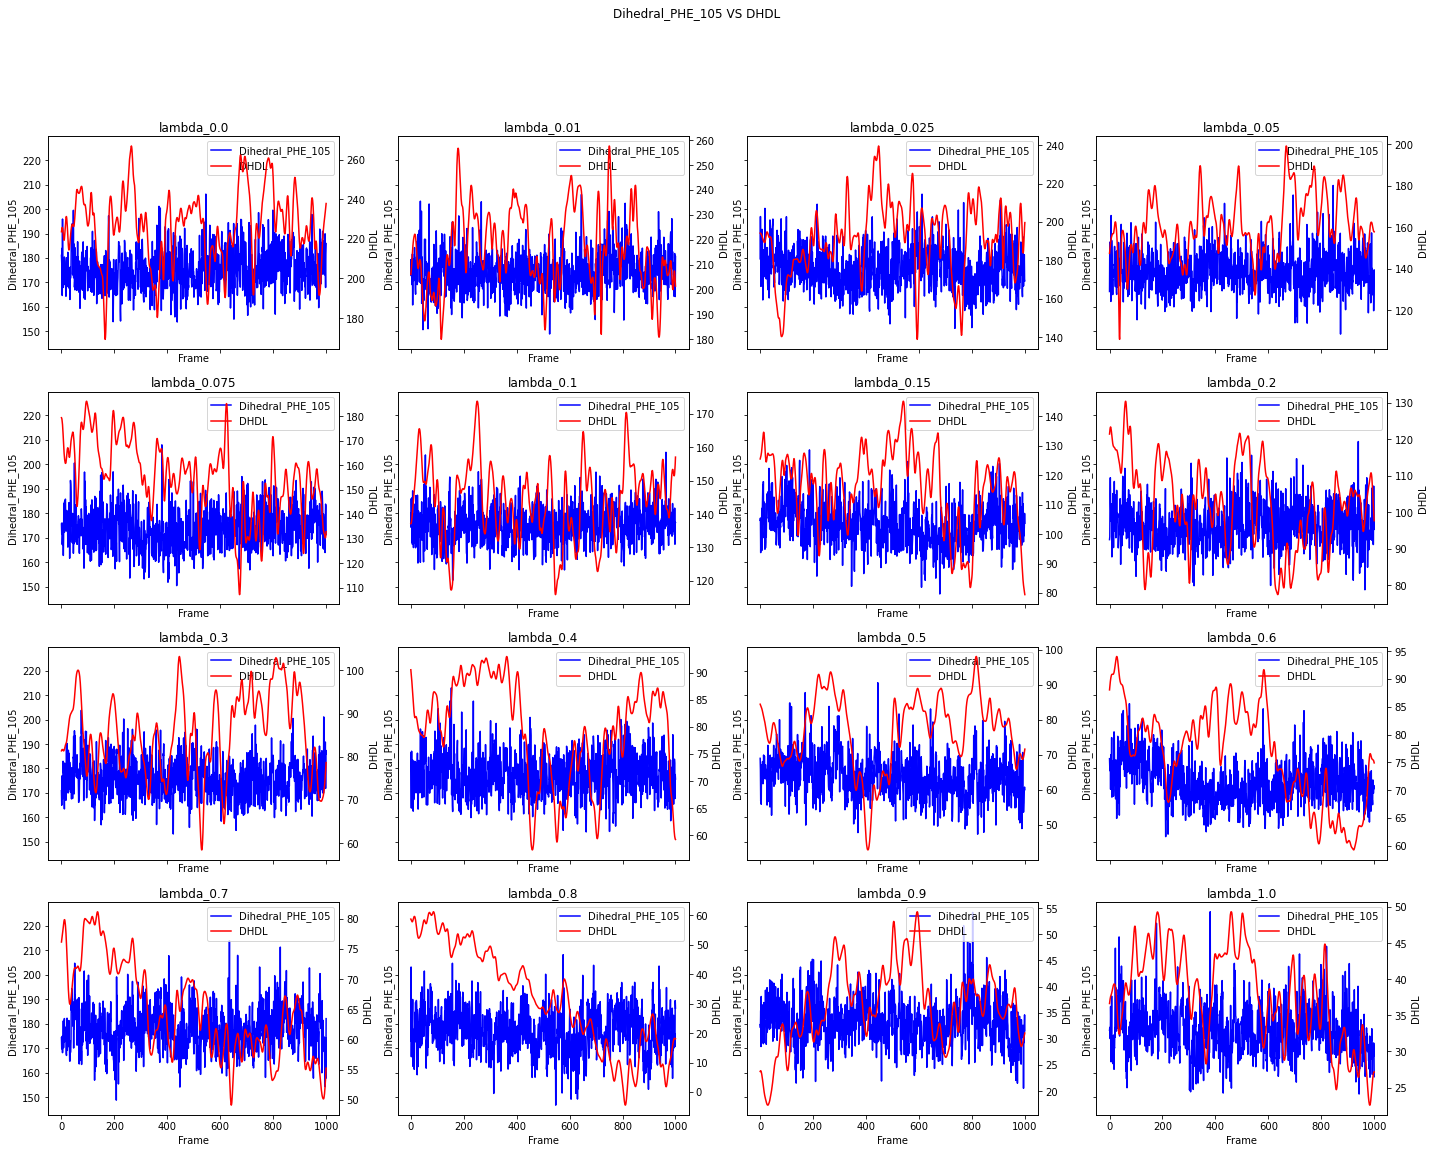

In [11]:
plot_dhdl('Dihedral_PHE_105')

0

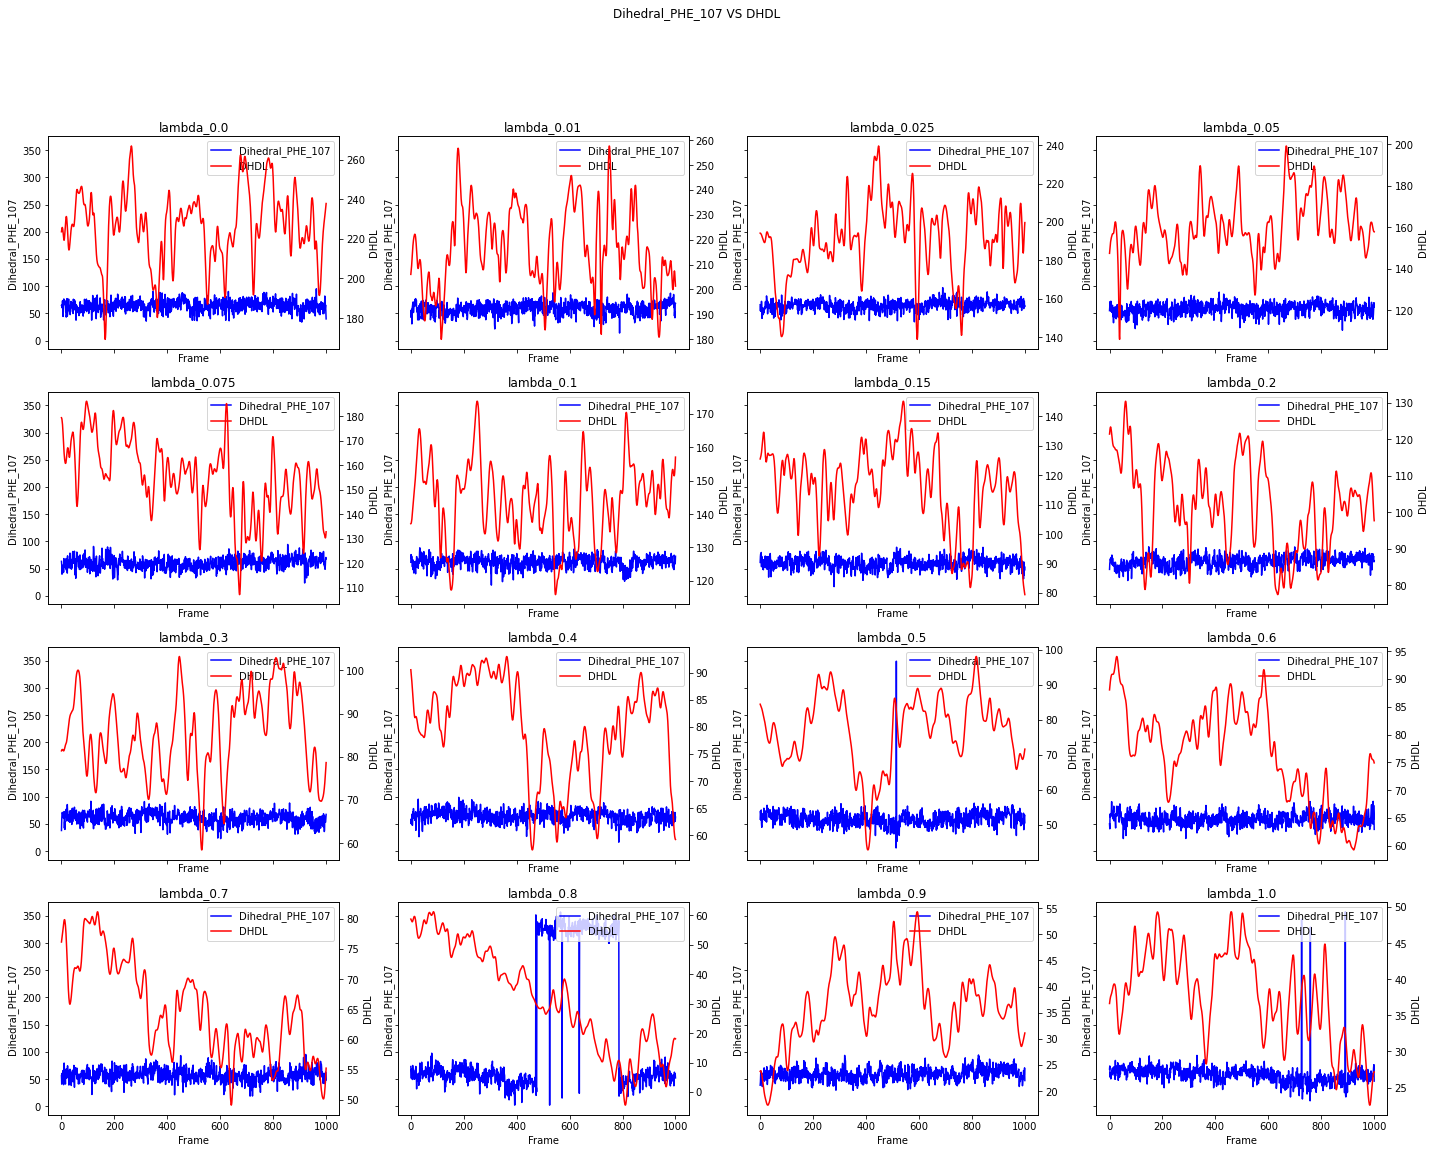

In [12]:
plot_dhdl('Dihedral_PHE_107')

0

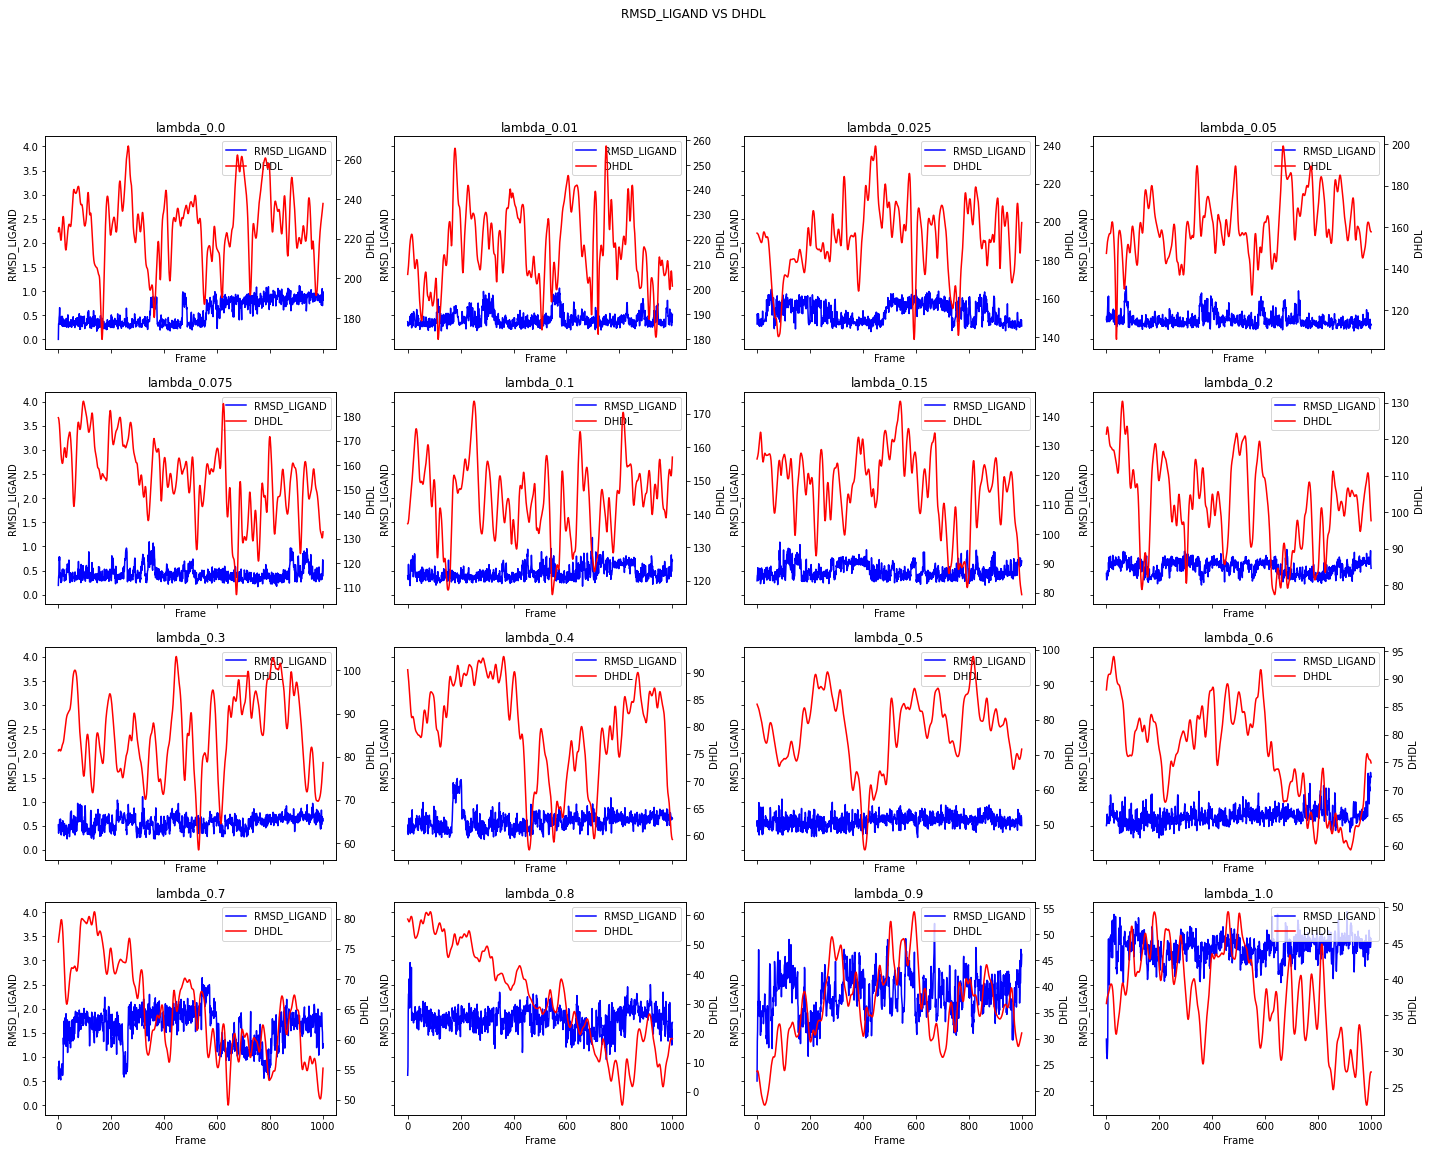

In [13]:
plot_dhdl('RMSD_LIGAND')

0

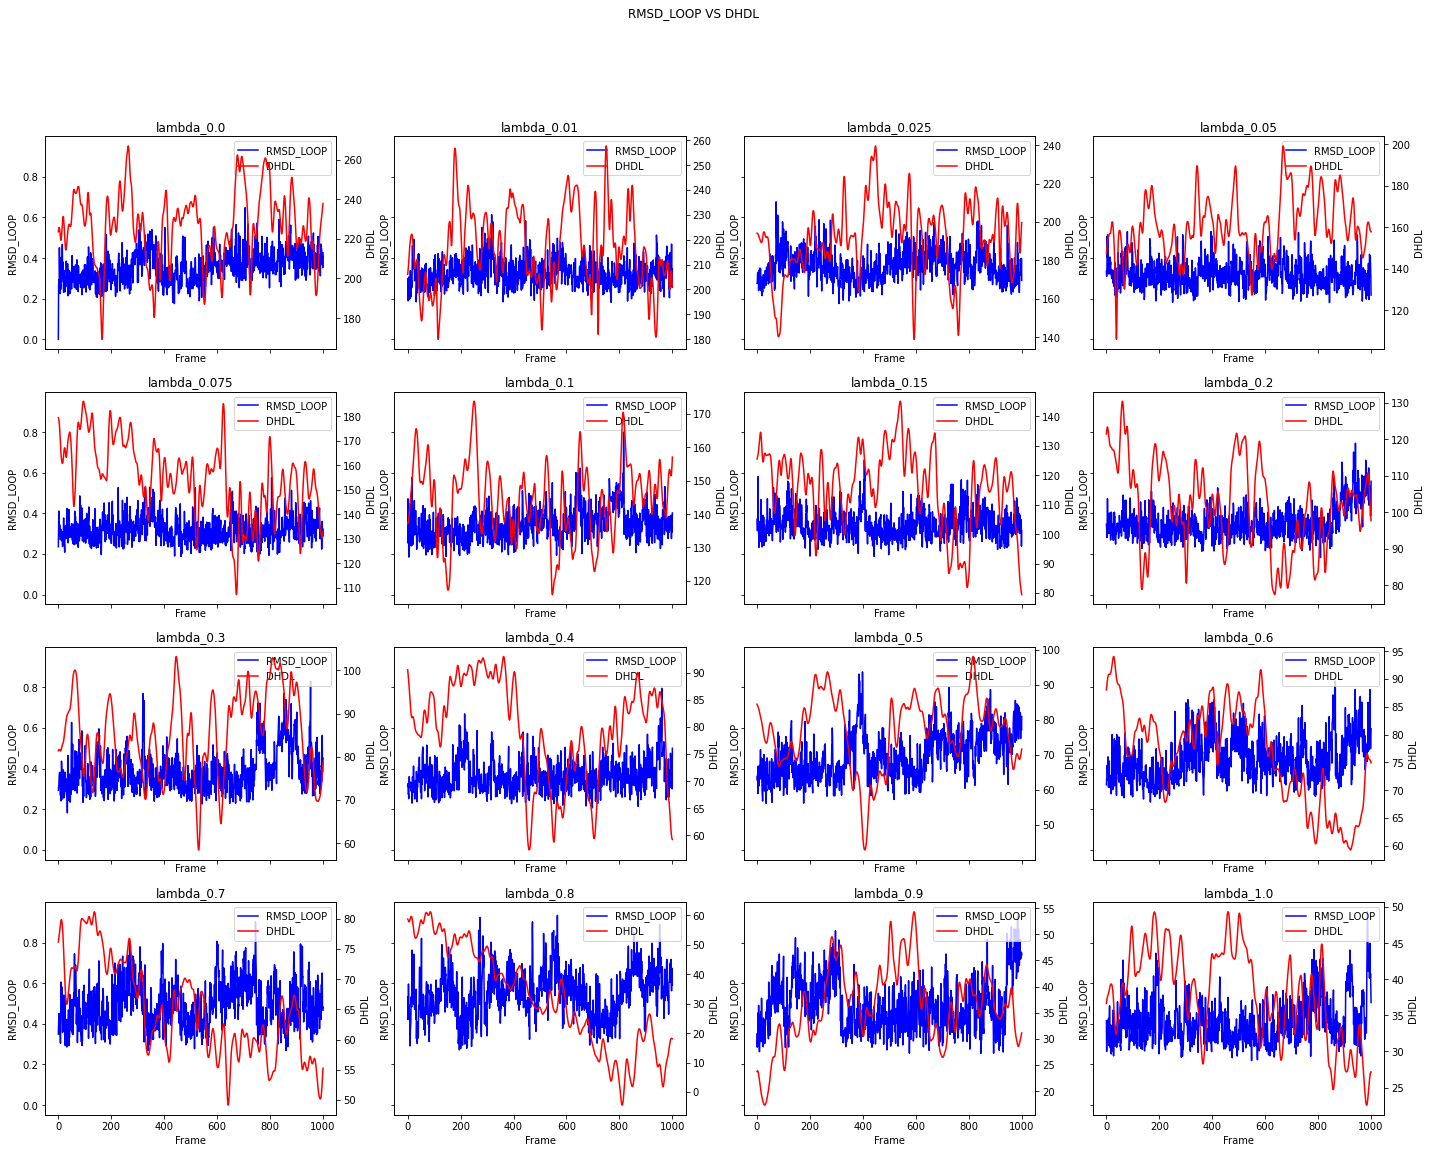

In [14]:
plot_dhdl('RMSD_LOOP')

0

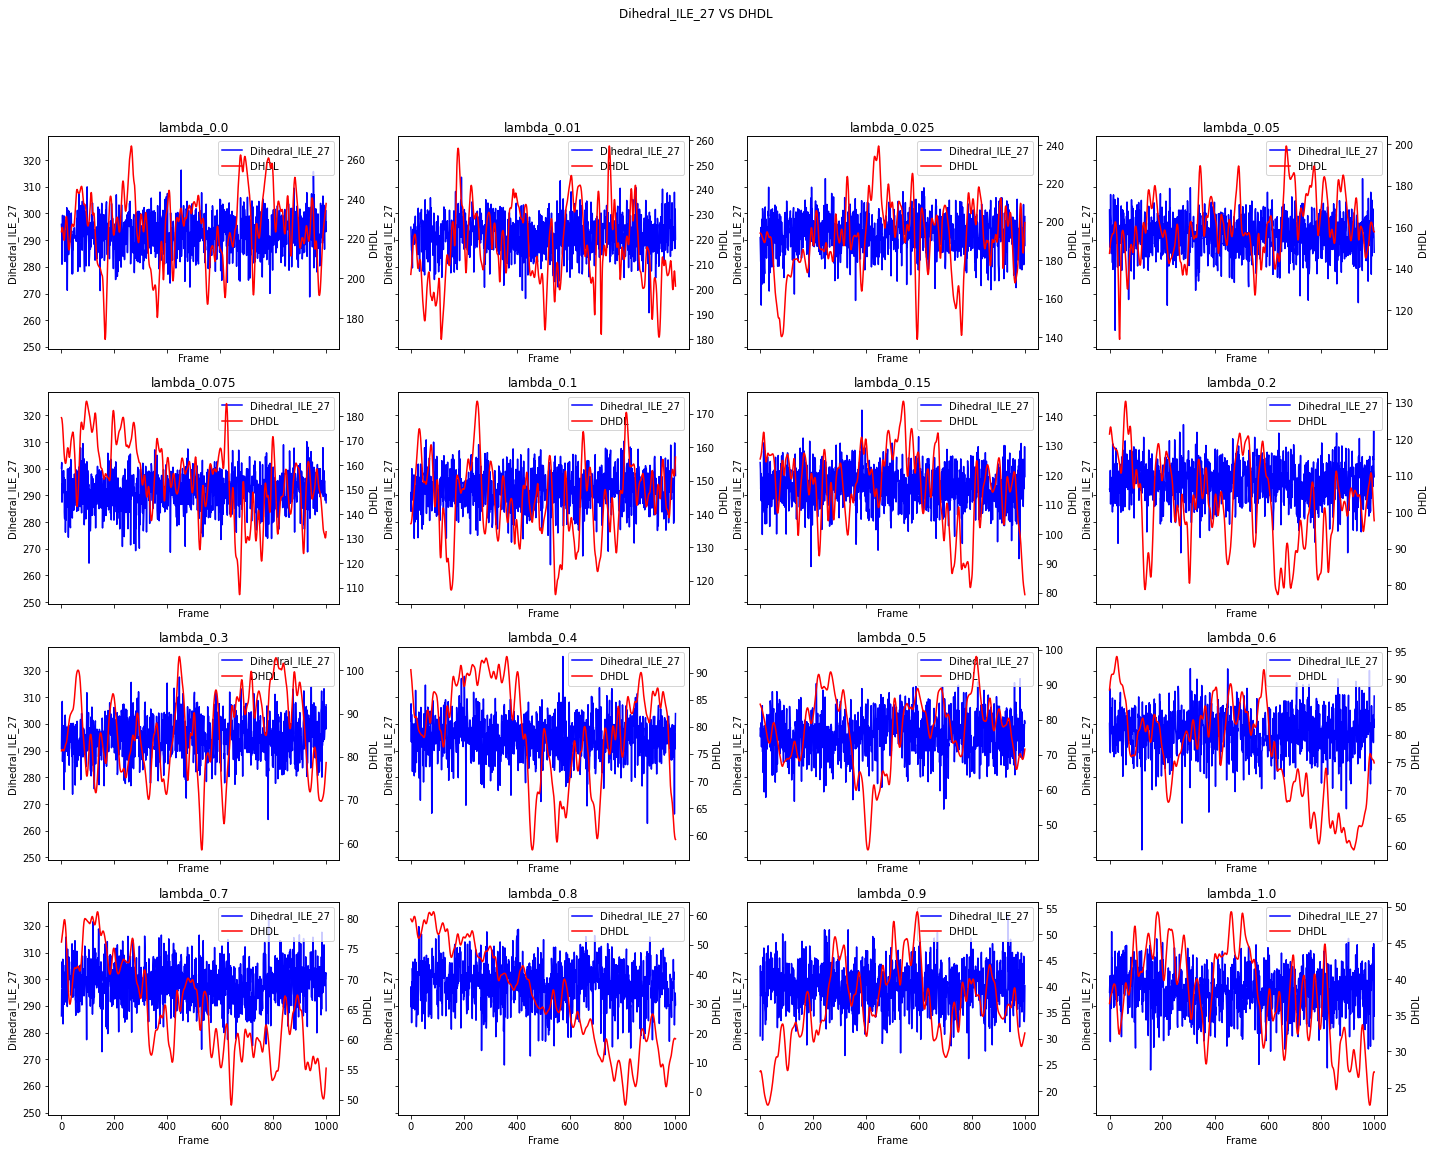

In [15]:
plot_dhdl('Dihedral_ILE_27')